In [118]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [119]:
class MonteCarlo(object):
    def __init__(self, n, f, x_min, x_max, y_min, y_max):
        self.n = n
        self.f = f
        self.area = 0
        self.x_hits, self.y_hits = [], [] # 落在函数下方的点
        self.x_miss, self.y_miss = [], [] # 落在函数上方的点
        self.x_min, self.x_max = x_min, x_max
        self.y_min, self.y_max = y_min, y_max

    def monte_carlo_integrate(self):
        count = 0
        # 生成随机点
        for i in range(self.n):
            x = random.uniform(0, np.pi)
            y = random.uniform(0, 1)
            if y <= self.f(x):             # 如果随机点落在函数下方
                count += 1                 # 计数器加一
                self.x_hits.append(x)      # 将随机点的x坐标添加到x_hits列表中
                self.y_hits.append(y)      # 将随机点的y坐标添加到y_hits列表中
            else:                          # 如果随机点落在函数上方
                self.x_miss.append(x)      # 将随机点的x坐标添加到x_miss列表中
                self.y_miss.append(y)      # 将随机点的y坐标添加到y_miss列表中
        self.area = np.pi * count / self.n # 计算面积

    def Show(self,):
        # 绘图
        plt.figure(dpi = 150)
        plt.plot(np.linspace(self.x_min, self.x_max, 100), self.f(np.linspace(self.x_min, self.x_max, 100)))
        plt.plot(self.x_hits, self.y_hits, 'o', markersize=1, color='green', label='Hit')
        plt.plot(self.x_miss, self.y_miss, 'o', markersize=1, color='red', label='Miss')
        ax = plt.gca()
        ax.set_xlim([self.x_min, self.x_max])
        ax.set_ylim([self.y_min, self.y_max])
        ax.set_title('Monte Carlo Integration(n='+str(self.n)+'),result='+str(np.around(self.area,5)))
        ax.set_xlabel('x')
        ax.set_ylabel('y')

        # 显示图形
        plt.show()

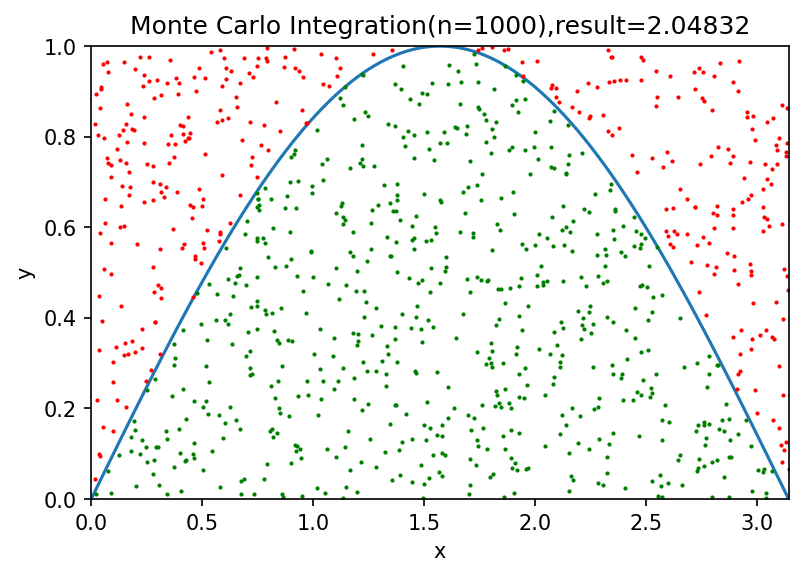

n=1000 时 sin(x) 的近似积分值为 2.04832 ,近似值与真实值之差的绝对值为 0.04832


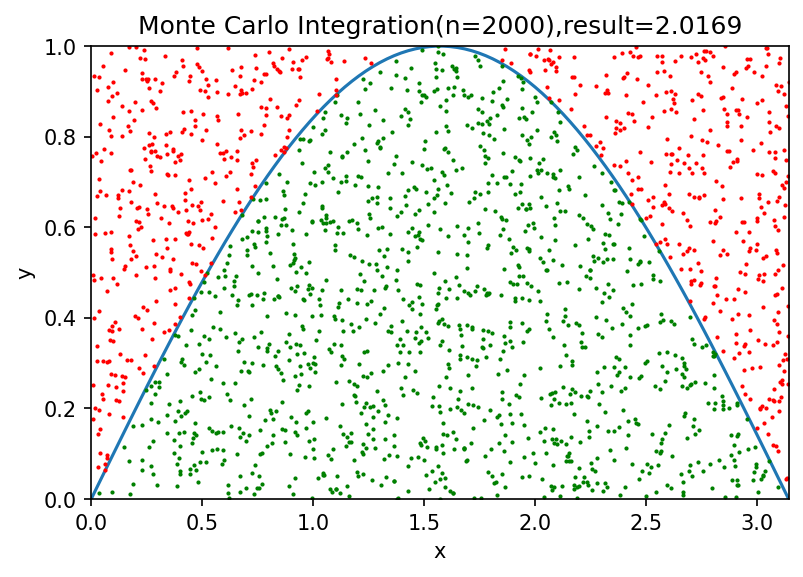

n=2000 时 sin(x) 的近似积分值为 2.0169 ,近似值与真实值之差的绝对值为 0.0169


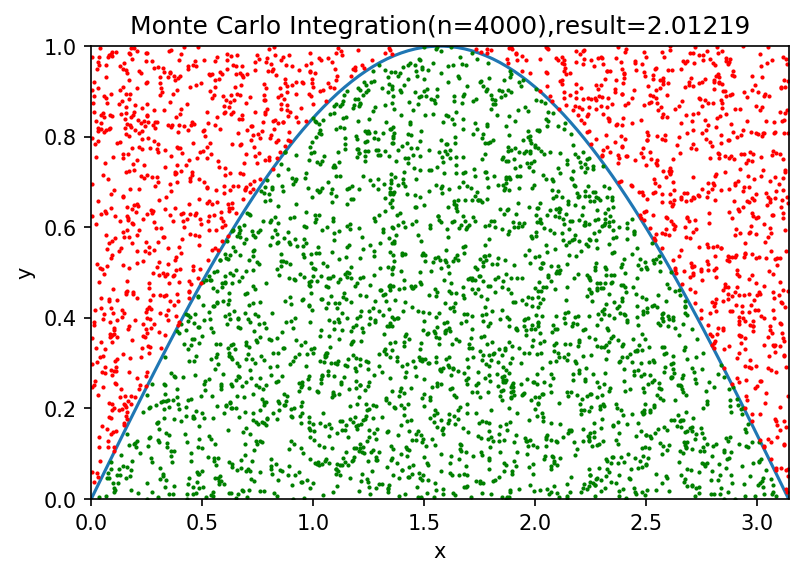

n=4000 时 sin(x) 的近似积分值为 2.01219 ,近似值与真实值之差的绝对值为 0.01219


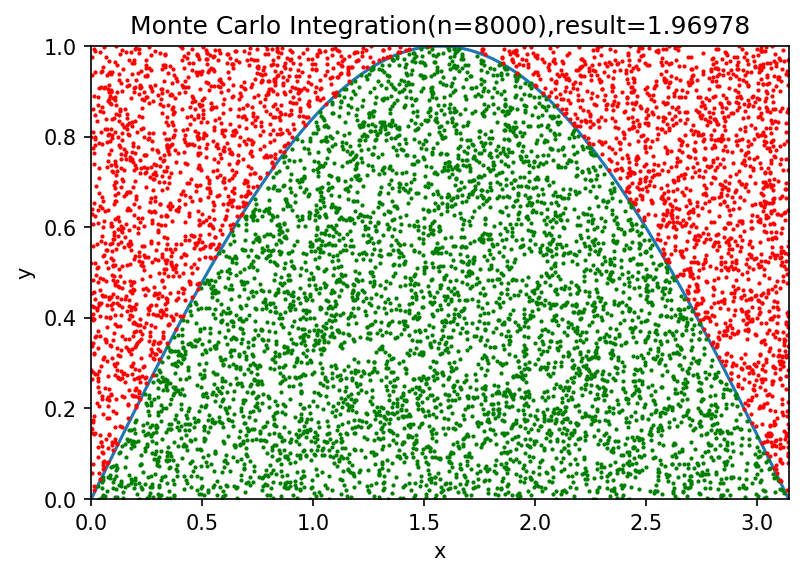

n=8000 时 sin(x) 的近似积分值为 1.96978 ,近似值与真实值之差的绝对值为 0.03022


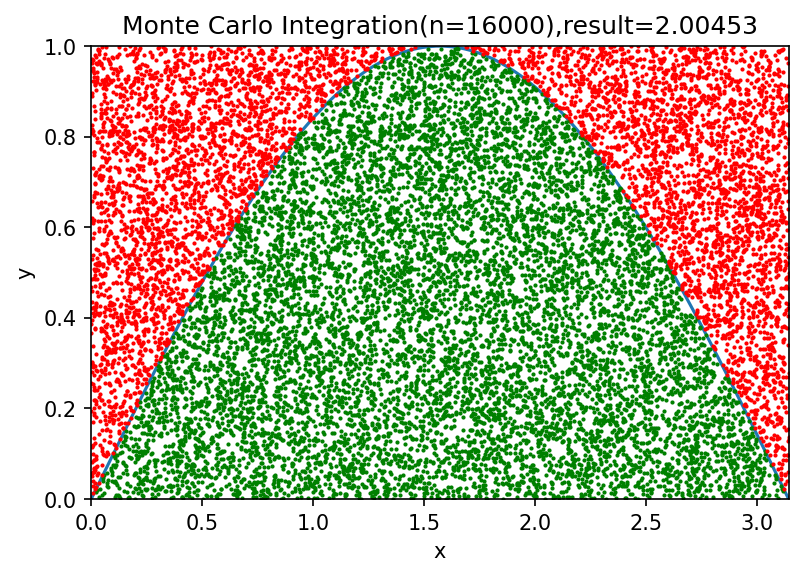

n=16000 时 sin(x) 的近似积分值为 2.00453 ,近似值与真实值之差的绝对值为 0.00453


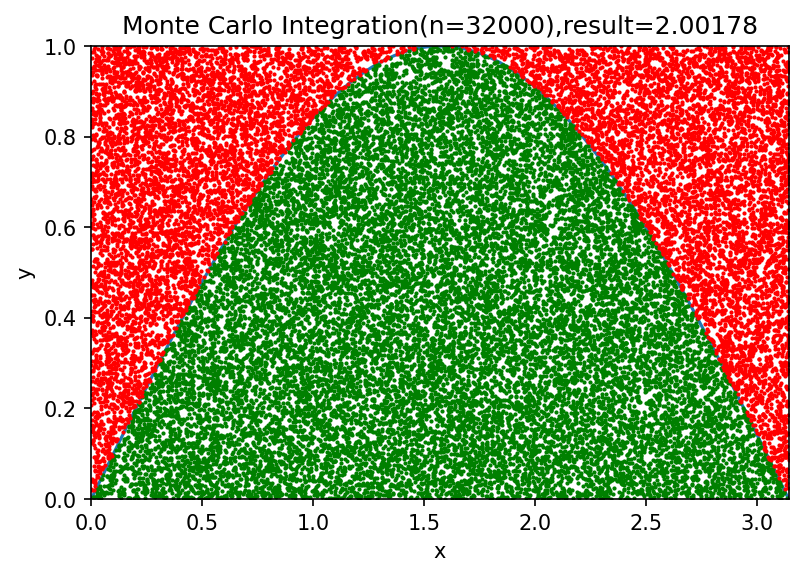

n=32000 时 sin(x) 的近似积分值为 2.00178 ,近似值与真实值之差的绝对值为 0.00178


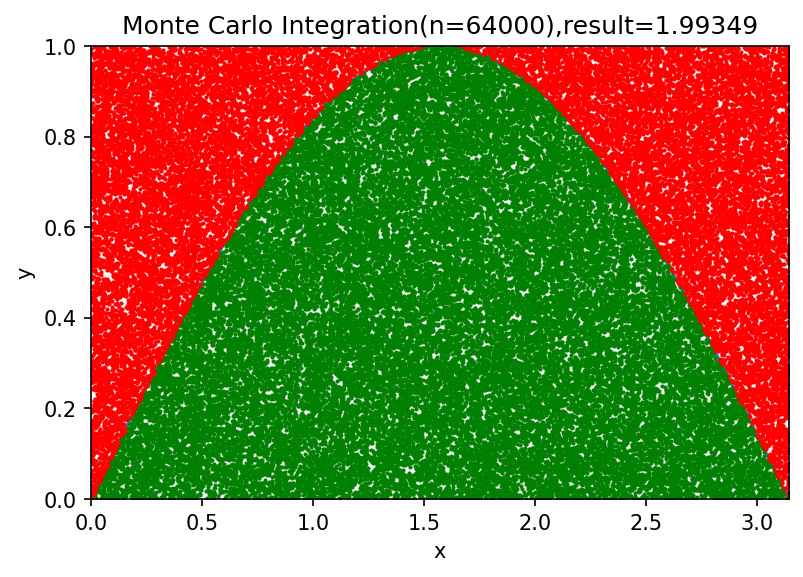

n=64000 时 sin(x) 的近似积分值为 1.99349 ,近似值与真实值之差的绝对值为 0.00651


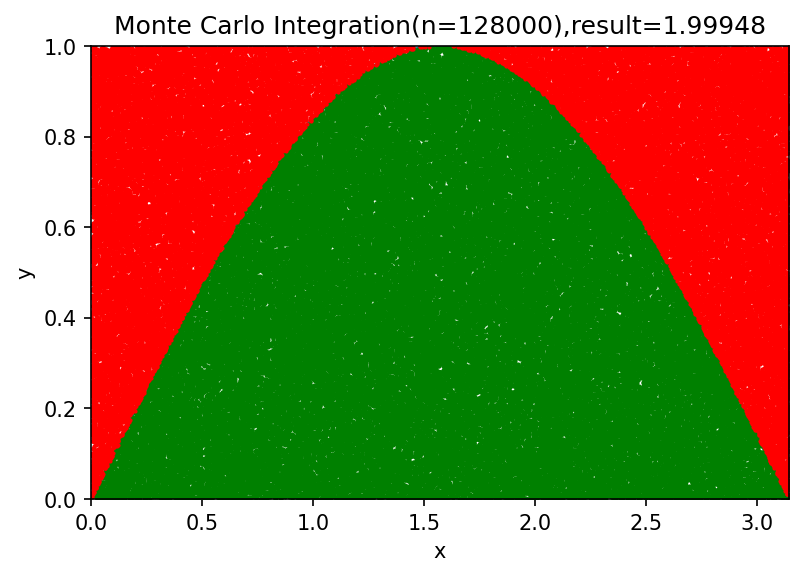

n=128000 时 sin(x) 的近似积分值为 1.99948 ,近似值与真实值之差的绝对值为 0.00052


In [120]:
area = []
offset = []
actual_value = 2
x_min, x_max = 0, np.pi
y_min, y_max = 0, 1
for n in [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000]:
    model = MonteCarlo(n, np.sin, x_min, x_max, y_min, y_max)
    model.monte_carlo_integrate()
    model.Show()
    area.append(np.around(model.area,5))
    offset.append(np.around(np.abs(model.area-actual_value),5))
    print('n='+str(n)+' 时 sin(x) 的近似积分值为 '+str(np.around(model.area,5))+' ,近似值与真实值之差的绝对值为 '+ str(np.around(np.abs(model.area-actual_value),5)))


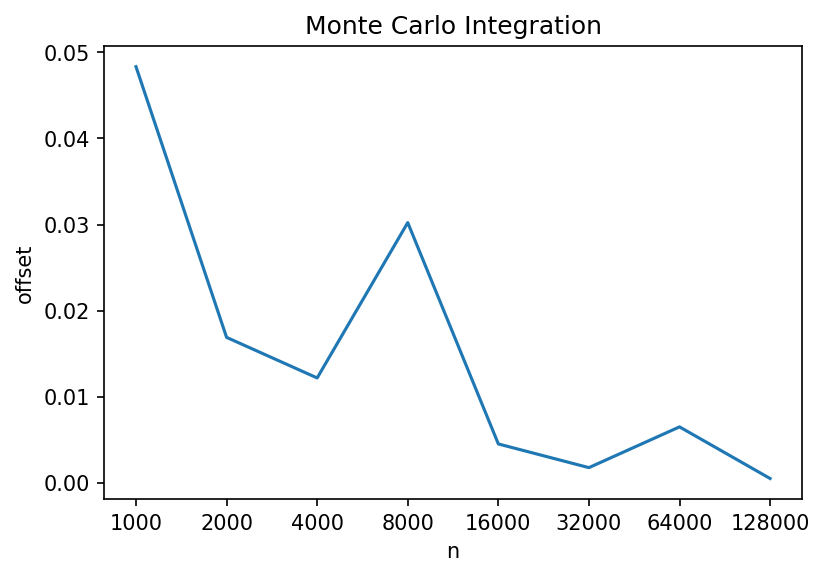

In [122]:
plt.figure(dpi = 150)
plt.plot([1,2,3,4,5,6,7,8], offset)
plt.xticks([1,2,3,4,5,6,7,8], [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000])
plt.title('Monte Carlo Integration')
plt.xlabel('n')
plt.ylabel('offset')
plt.show()